<a href="https://colab.research.google.com/github/arsudsandesh97/Global_Terrorism_Analysis_Capstone_Project./blob/main/Mobile_Price_Range_Prediction%20-%20Data%20Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Price Range Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -** Sandesh Sundarlal Arsud

# **Project Summary -**

In view of the intense competition in the mobile phone market, businesses are continuously looking for information about the factors that influence prices in order to make wise financial decisions. The goal of this research is to examine mobile phone sales data and determine the relationship between a mobile phone's features (such as RAM, internal memory, etc.) and its selling price. Instead than projecting the precise price, the emphasis is on establishing a price range that shows how high the price is in relation to other prices.

Several classification models were tested utilising performance criteria like accuracy, recall, precision, and F1-score to solve this issue. Logistic Regression, Random Forest (Baseline), XGBoost (Baseline), and XGBoost (Tuned) were the models taken into account in the analysis.

The analysis's findings provided the following key insights:

- The accuracy of the Logistic Regression model was 0.905, meaning that it accurately identified the price ranges for mobile phones 90.5% of the time. In addition, the model showed strong recall, precision, and F1-score, which were all in the range of 0.905 and 0.904, respectively. According to these criteria, the Logistic Regression model is a good one for forecasting price ranges.

- Recall, precision, and F1-score for the Random Forest (Baseline) model were all close to 0.865, and accuracy was obtained at 0.865. The Random Forest model nonetheless did a respectable job at predicting price ranges, despite the fact that these metrics were slightly lower than those of Logistic Regression.

- The best performance was shown by the XGBoost (Baseline) and XGBoost (Tuned) models, which had accuracy of 0.910 and recall, precision, and F1-score of roughly 0.910 and 0.912, respectively. This shows that the XGBoost model's two iterations are quite good at forecasting mobile phone price ranges.

- According to these findings, it can be said that the XGBoost models—both the baseline and adjusted versions—are the best at forecasting the price ranges of mobile phones. XGBoost is renowned for its capacity to manage intricate data relationships and has distinguished itself in a number of machine learning competitions. Additionally, the tuned variant of XGBoost, which underwent hyperparameter optimisation using GridSearchCV, probably gains from optimised hyperparameters, resulting in enhanced performance.

- conclusions offer useful information to businesses that sell mobile phones. Companies may decide wisely on product pricing, feature prioritisation, and market positioning by knowing the relationship between mobile phone features and price points. Businesses can get a competitive edge by providing goods that are in line with client expectations and market trends when they have the capacity to foresee pricing ranges.



# **GitHub Link -**

https://github.com/arsudsandesh97/Mobile-Price-Range-Prediction

# **Problem Statement**


**In the competitive mobile phone market companies want to understand sales data of mobile
phones and factors which drive the prices. The objective is to find out some relation between
features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem,
we do not have to predict the actual price but a price range indicating how high the price is.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms

### Dataset Loading

In [2]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')


path = ('/content/drive/MyDrive/project/Mobile Price Range Prediction/data_mobile_price_range.csv')

df = pd.read_csv(path, print('Data Imported Successfully'))

Mounted at /content/drive
Data Imported Successfully


### Dataset First View

In [3]:
# Dataset First Look

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count

df.shape

(2000, 21)

### Dataset Information

In [5]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

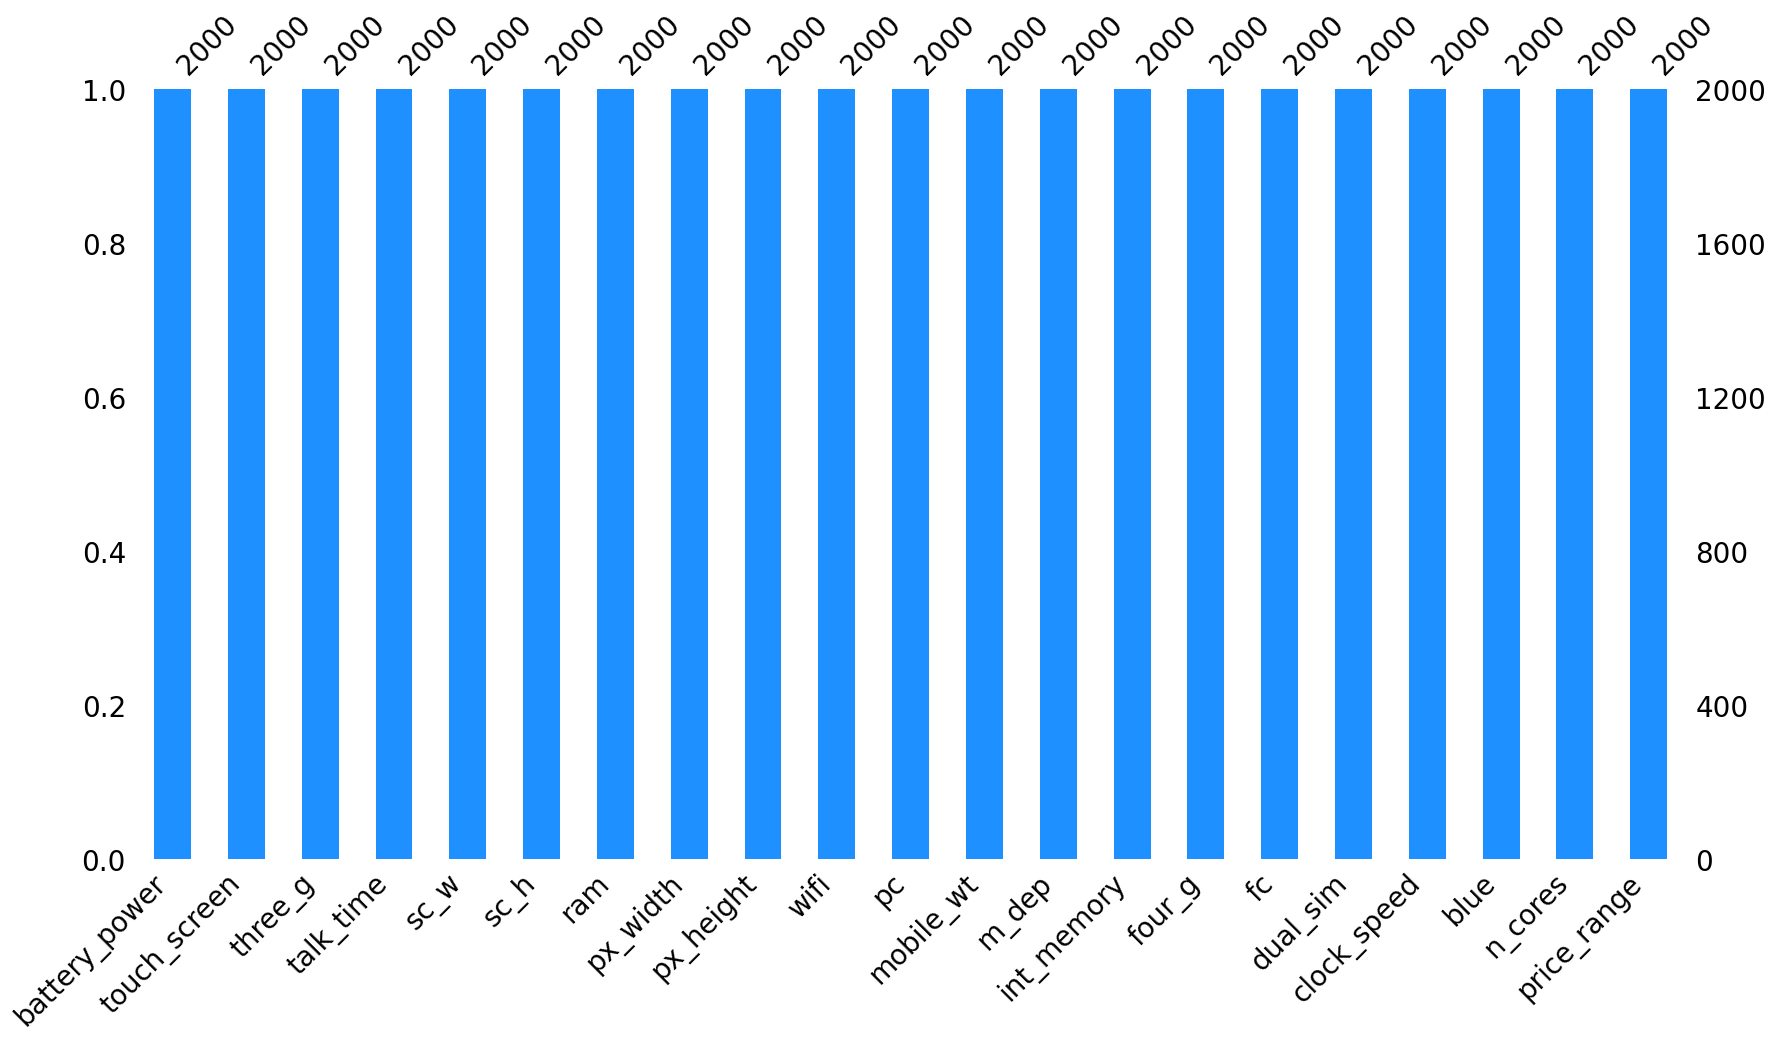

In [8]:
# Visualizing the missing values
ms.bar(df.isnull(), color="dodgerblue", sort="ascending", figsize=(20,10), fontsize=20);

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns

df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [10]:
# Dataset Describe

df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.

for i in df.columns.tolist():
   print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  battery_power is 1094 .
No. of unique values in  blue is 2 .
No. of unique values in  clock_speed is 26 .
No. of unique values in  dual_sim is 2 .
No. of unique values in  fc is 20 .
No. of unique values in  four_g is 2 .
No. of unique values in  int_memory is 63 .
No. of unique values in  m_dep is 10 .
No. of unique values in  mobile_wt is 121 .
No. of unique values in  n_cores is 8 .
No. of unique values in  pc is 21 .
No. of unique values in  px_height is 1137 .
No. of unique values in  px_width is 1109 .
No. of unique values in  ram is 1562 .
No. of unique values in  sc_h is 15 .
No. of unique values in  sc_w is 19 .
No. of unique values in  talk_time is 19 .
No. of unique values in  three_g is 2 .
No. of unique values in  touch_screen is 2 .
No. of unique values in  wifi is 2 .
No. of unique values in  price_range is 4 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.

#How many columns in the screen width have numbers of 0?
df[df['sc_w']==0].shape[0]

180

In [13]:
#We are replacing 0 value with mean
df['sc_w']=df['sc_w'].replace(0,df['sc_w'].mean())

In [14]:
#verifying the shape of the screen's shape
df[df['sc_w']==0].shape[0]

0

In [15]:
#How many numbers in a column of pixels have a value of 0?

df[df['px_height']==0].shape[0]

2

In [16]:
#Rows with pixel height 0 should be dropped.
df=df[df['px_height']!=0]

In [17]:
df.shape

(1998, 21)

In [18]:
#Lists of numerical and categorical categories are being created.
numerical_columns=[]
for col in df.columns:
  if df[col].nunique()>5:
    numerical_columns.append(col)
categorical_columns=list(set(df.columns)-set(numerical_columns))

In [19]:

print("The Numerical Columns Are :",numerical_columns)

The Numerical Columns Are : ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


In [20]:
print("The Categorical Columns Are :",categorical_columns)

The Categorical Columns Are : ['touch_screen', 'three_g', 'dual_sim', 'wifi', 'price_range', 'blue', 'four_g']


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

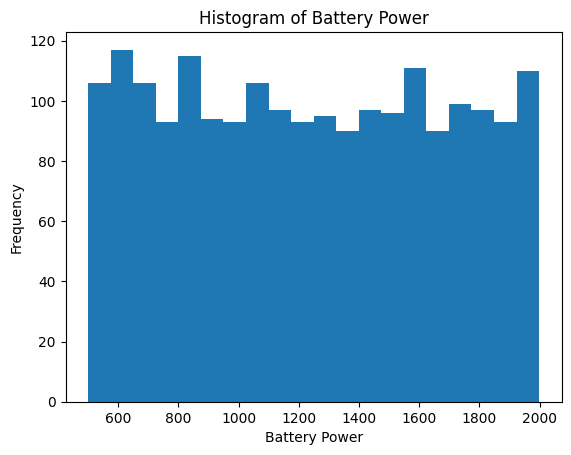

In [21]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt

plt.hist(df['battery_power'], bins=20)
plt.title('Histogram of Battery Power')
plt.xlabel('Battery Power')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a histogram because it allows you to visually display the distribution of data and identify patterns, outliers, and other important characteristics of the dataset. It is essential in data analysis and can help you make more informed decisions based on the insights it provides.

##### 2. What is/are the insight(s) found from the chart?

flutter between frequency and battery power

#### Chart - 2

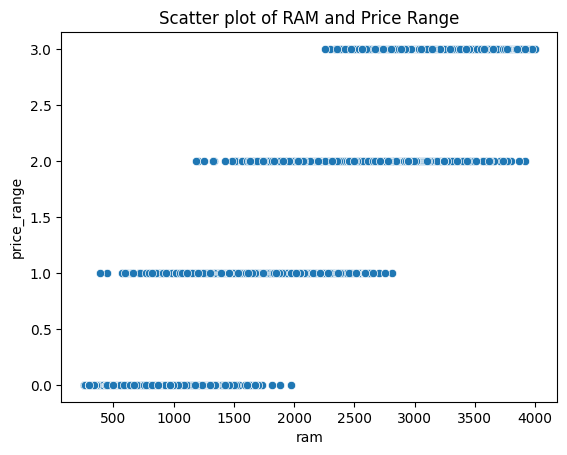

In [22]:
# Chart - 2 visualization code
import seaborn as sns

sns.scatterplot(x='ram', y='price_range', data=df)
plt.title('Scatter plot of RAM and Price Range')
plt.show()


##### 1. Why did you pick the specific chart?

choose Scatter plot is important because it allows you to visualize the relationship between two variables and identify any patterns or trends that may exist. It can also help you identify outliers and assess the strength and direction of the relationship between the variables.

#### Chart - 3

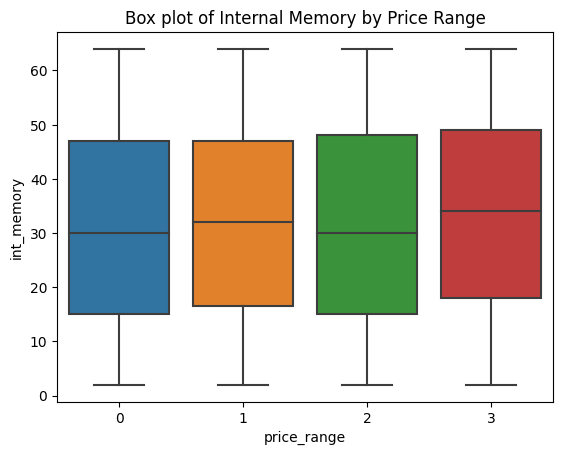

In [23]:
# Chart - 3 visualization code

sns.boxplot(x='price_range', y='int_memory', data=df)
plt.title('Box plot of Internal Memory by Price Range')
plt.show()


##### 1. Why did you pick the specific chart?

Choose A box plot is important because it provides a graphical representation of the distribution of data, allowing you to easily identify the median, range, and outliers of a dataset. It is useful for comparing multiple data sets and identifying any differences or similarities in their distributions.

##### 2. What is/are the insight(s) found from the chart?

almost same price range

#### Chart - 4

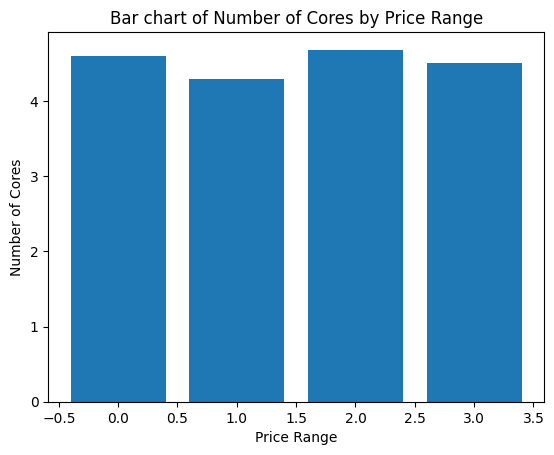

In [24]:
# Chart - 4 visualization code

cores = df.groupby('price_range')['n_cores'].mean()
plt.bar(cores.index, cores)
plt.title('Bar chart of Number of Cores by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Cores')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

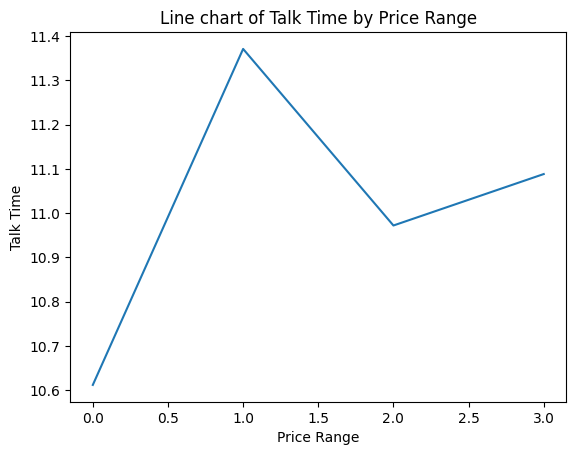

In [25]:
# Chart - 5 visualization code

talk_time = df.groupby('price_range')['talk_time'].mean()
plt.plot(talk_time.index, talk_time)
plt.title('Line chart of Talk Time by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Talk Time')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

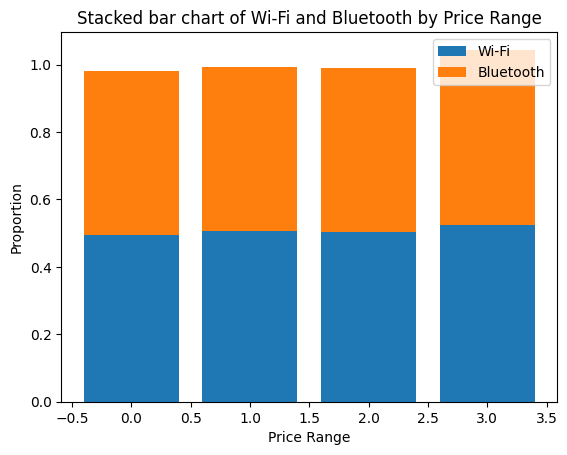

In [26]:
# Chart - 6 visualization code

wifi = df.groupby('price_range')['wifi'].mean()
bluetooth = df.groupby('price_range')['blue'].mean()

plt.bar(wifi.index, wifi, label='Wi-Fi')
plt.bar(bluetooth.index, bluetooth, bottom=wifi, label='Bluetooth')
plt.legend()
plt.title('Stacked bar chart of Wi-Fi and Bluetooth by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Proportion')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

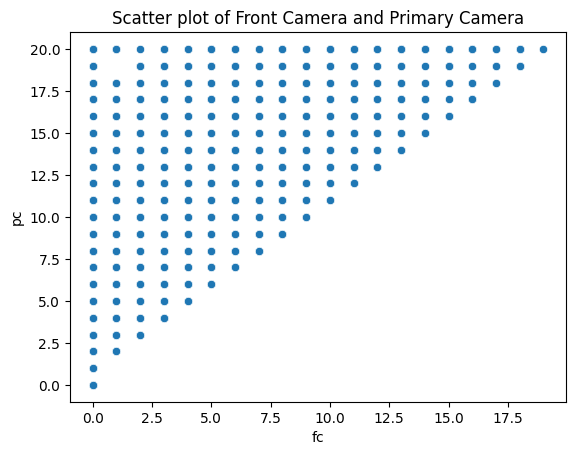

In [27]:
# Chart - 7 visualization code

sns.scatterplot(x='fc', y='pc', data=df)
plt.title('Scatter plot of Front Camera and Primary Camera')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

<Axes: >

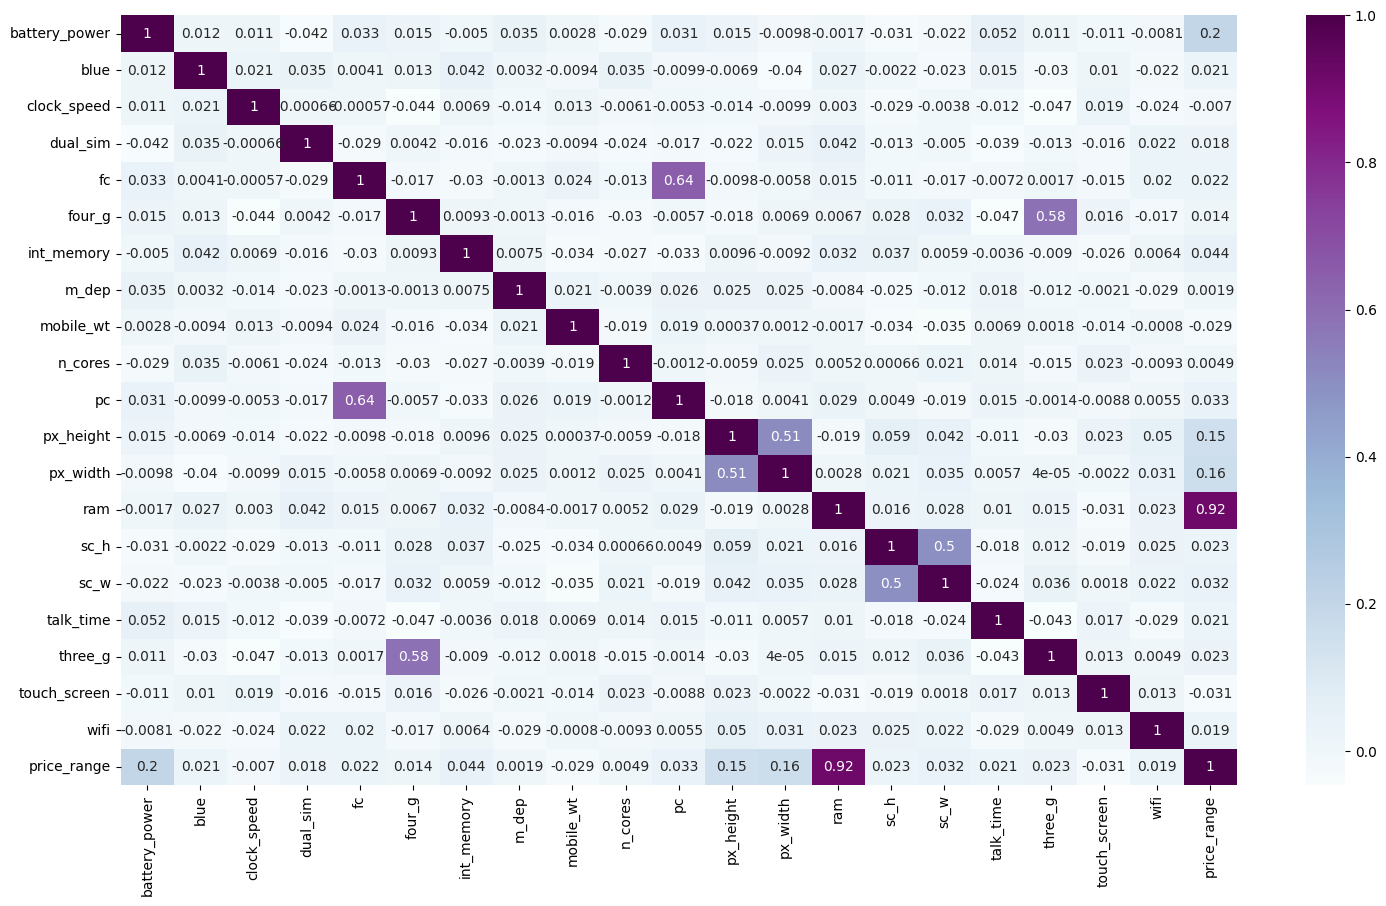

In [28]:
# Chart - 8 visualization code

corre = df.corr()
plt.figure(figsize = [18,10])
sns.heatmap(corre, cmap = 'BuPu', annot = True)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

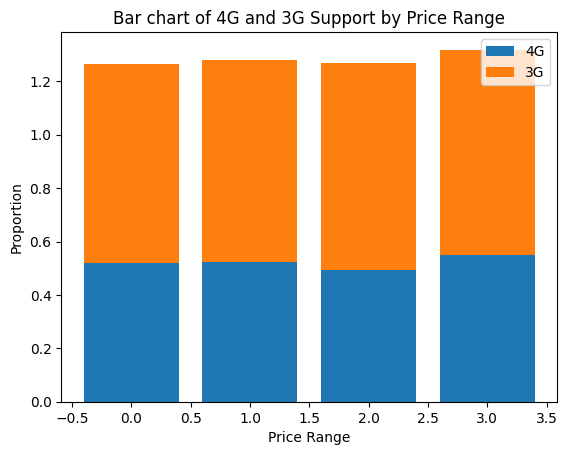

In [29]:
# Chart - 9 visualization code


four_g = df.groupby('price_range')['four_g'].mean()
three_g = df.groupby('price_range')['three_g'].mean()

plt.bar(four_g.index, four_g, label='4G')
plt.bar(three_g.index, three_g, bottom=four_g, label='3G')
plt.legend()
plt.title('Bar chart of 4G and 3G Support by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Proportion')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

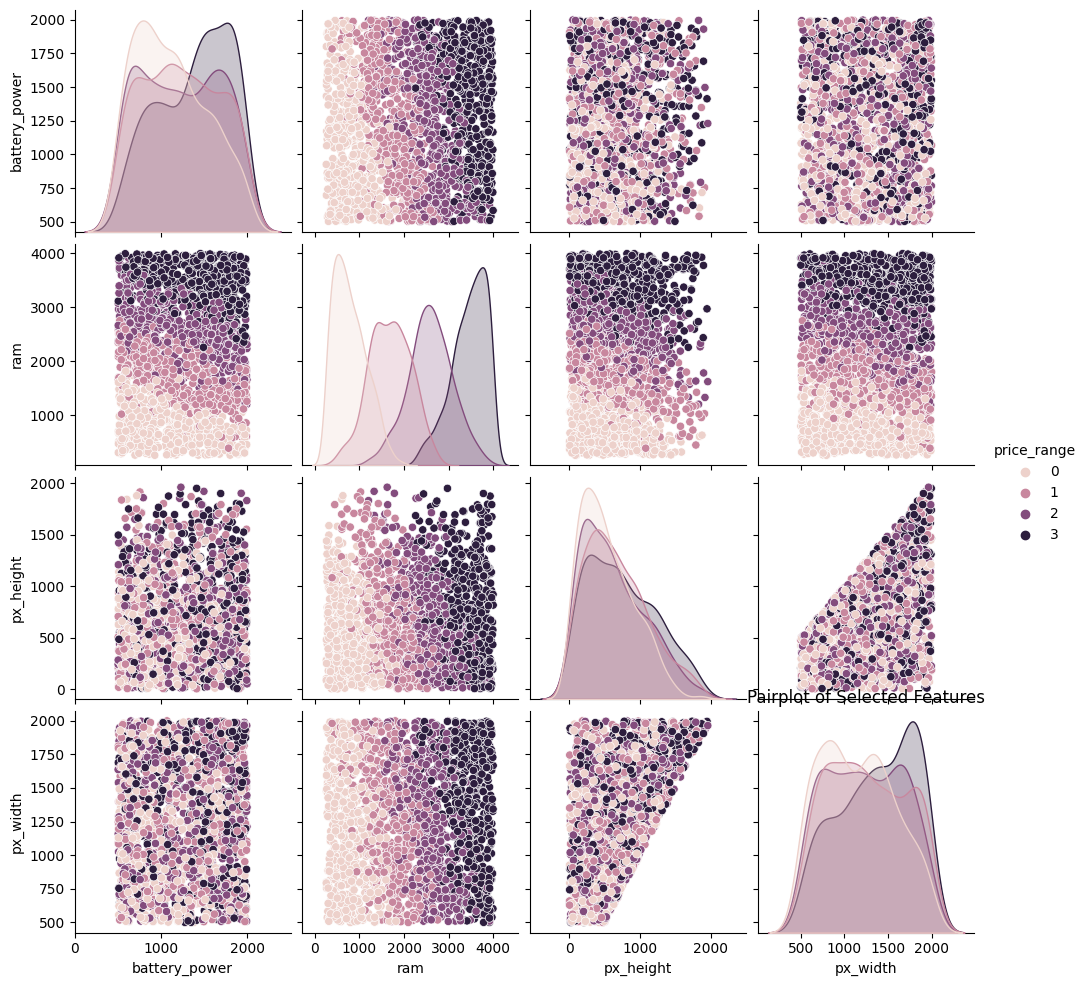

In [30]:
# Chart - 10 visualization code

sns.pairplot(df[['battery_power', 'ram', 'px_height', 'px_width', 'price_range']], hue='price_range')
plt.title('Pairplot of Selected Features')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

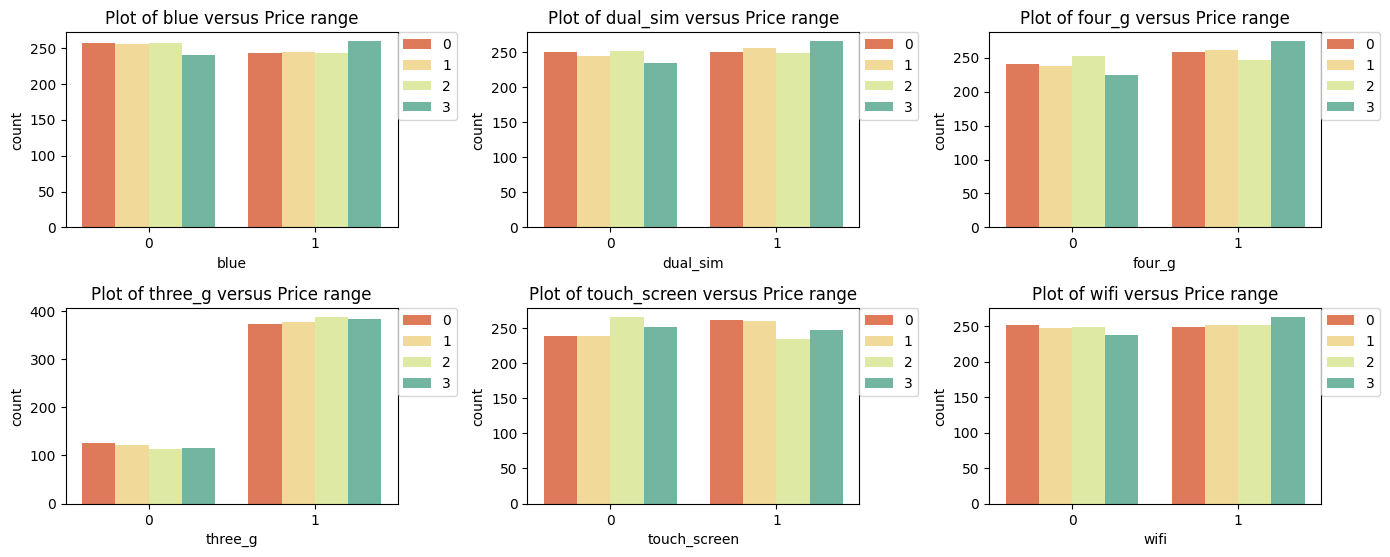

In [31]:
# Chart - 11 visualization code

#count plot of price range vs categorical columns
fig = plt.figure(figsize=(14,8))
c=1
for i in ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'] :
    plt.subplot(3,3, c)
    sns.countplot(x=i,data=df,hue='price_range', palette='Spectral')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
    plt.title(f'Plot of {i} versus Price range')
    c = c + 1
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

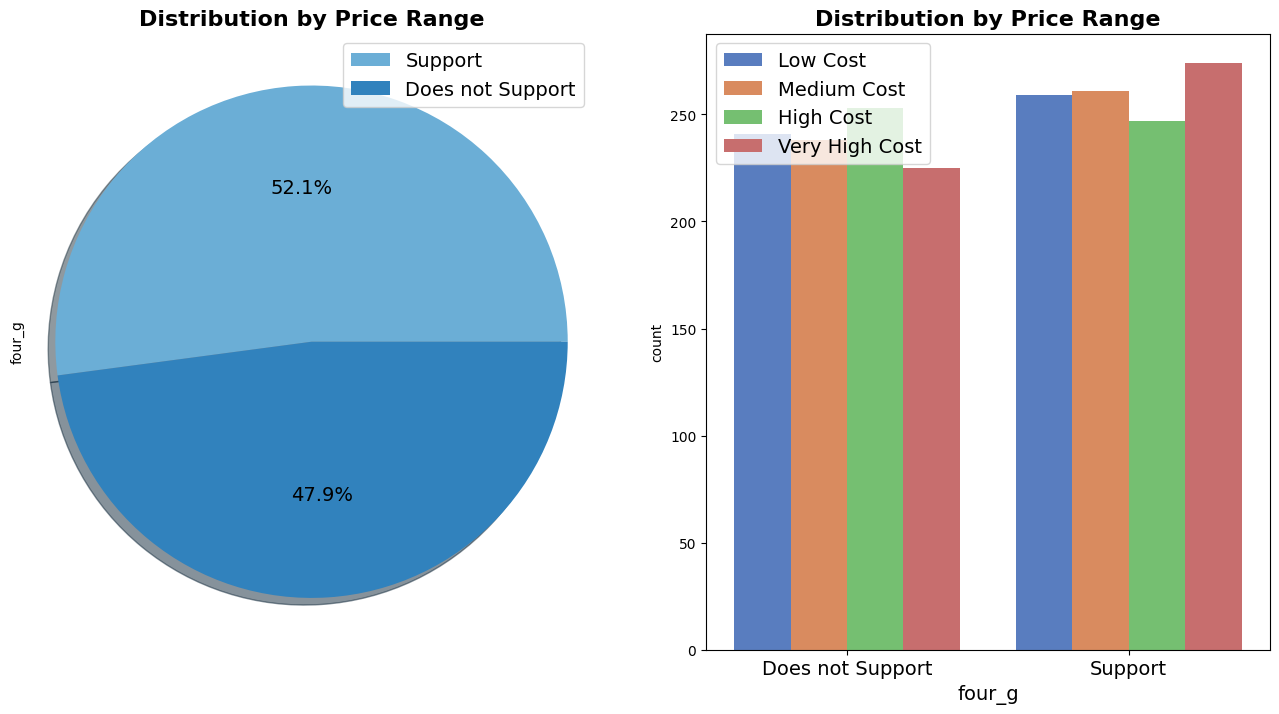

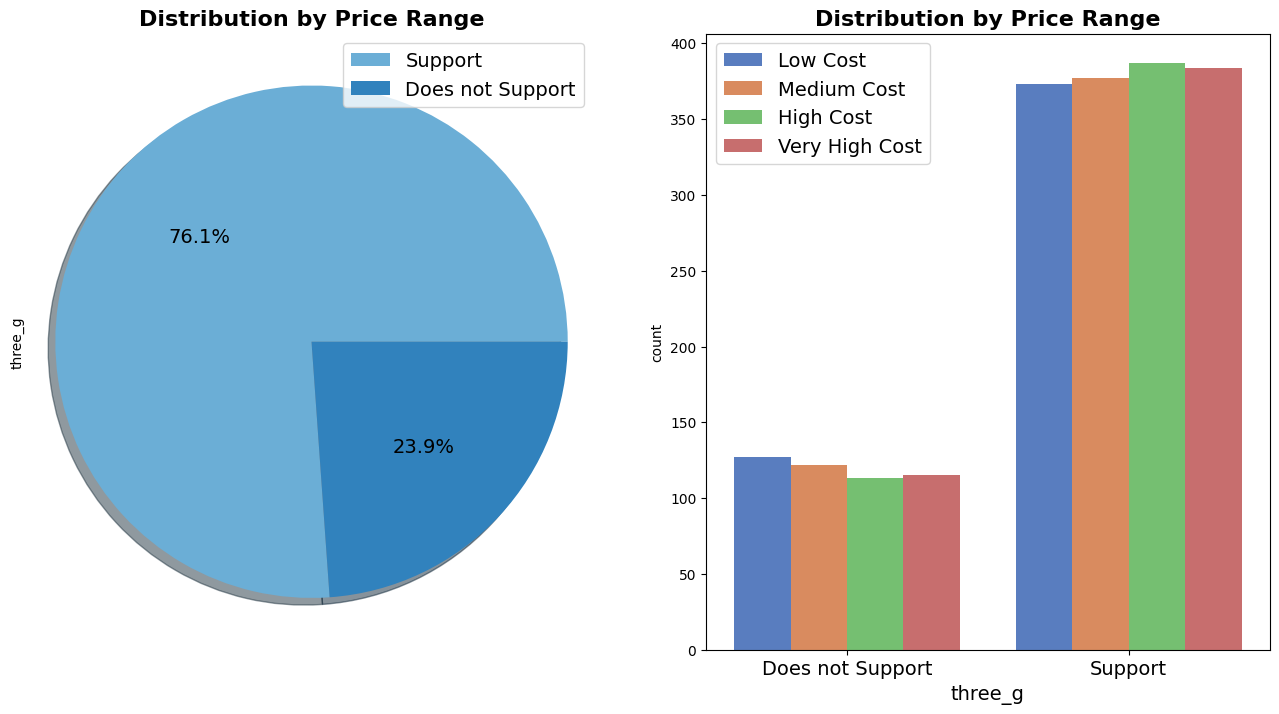

In [32]:
# Chart - 12 visualization code

binary_features = ['four_g', 'three_g']

for dataset in binary_features:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))

    palette_color = ['#6baed6', '#3182bd']
    df[dataset].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1, colors=palette_color,
                                                  shadow=True, labeldistance=None, textprops={'fontsize': 14})
    ax1.set_title('Distribution by Price Range', fontsize=16, fontweight='bold')
    ax1.legend(['Support', 'Does not Support'], loc='upper right', fontsize=14)
    ax1.axis('equal')

    sns.countplot(x=dataset, hue='price_range', data=df, ax=ax2, palette='muted')
    ax2.set_title('Distribution by Price Range', fontsize=16, fontweight='bold')
    ax2.set_xlabel(dataset, fontsize=14)
    ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'], fontsize=14)
    ax2.set_xticklabels(['Does not Support', 'Support'], fontsize=14)

    plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

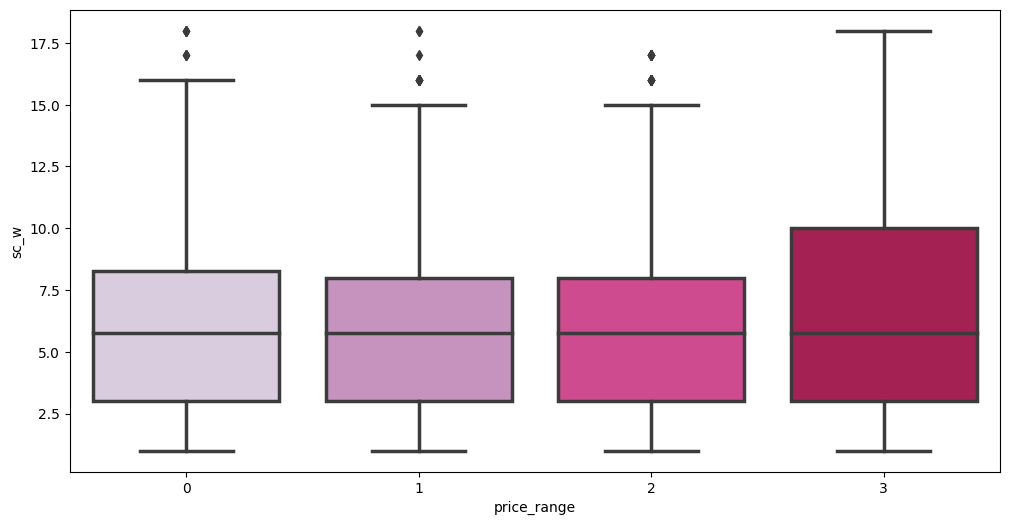

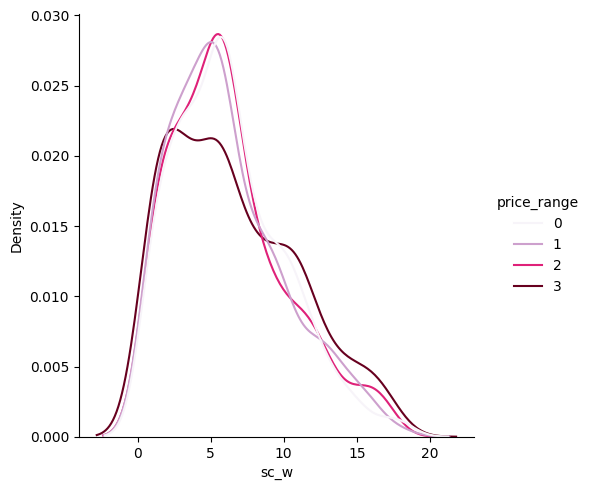

In [33]:
# Chart - 13 visualization code
#plotting price range with screen width
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x="price_range",y="sc_w",palette="PuRd",linewidth=2.5)
sns.displot(data=df, x="sc_w", hue="price_range", kind="kde",palette="PuRd")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14

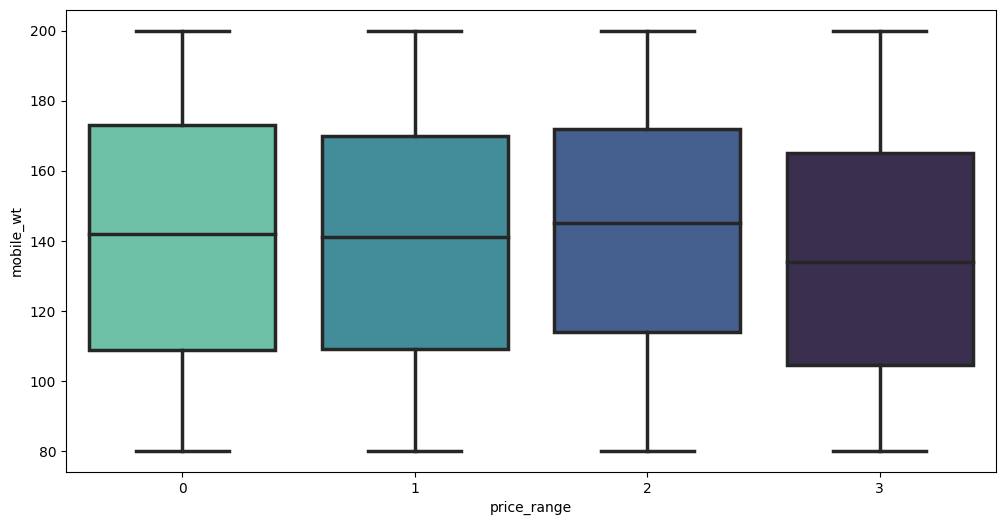

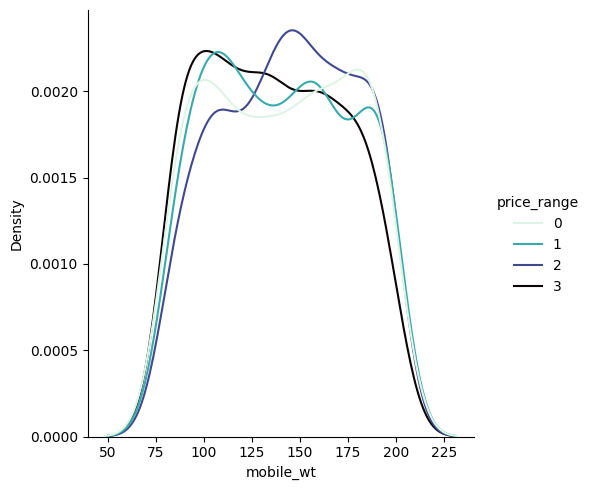

In [34]:
# visualization code

plt.figure(figsize=(12,6))
sns.boxplot(data=df,x="price_range",y="mobile_wt",palette="mako_r",linewidth=2.5)
sns.displot(data=df, x="mobile_wt", hue="price_range", kind="kde",palette="mako_r")

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15

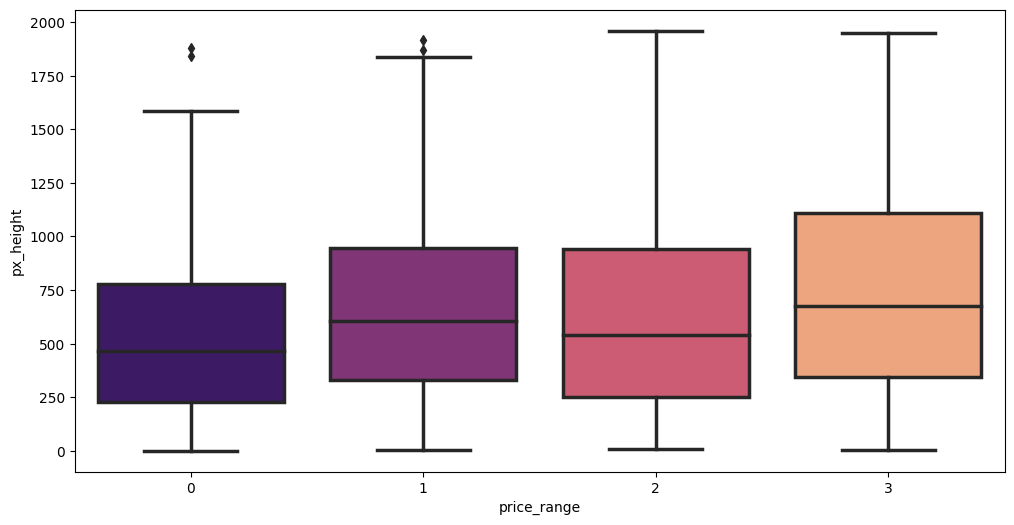

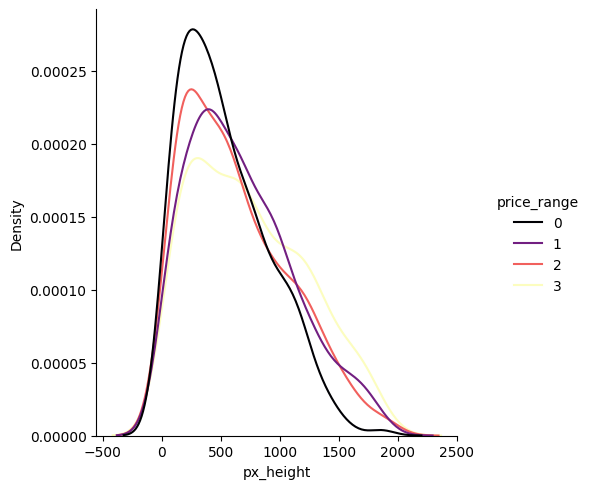

In [35]:
# visualization code

#plotting price range with pixel resolution height
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x="price_range",y="px_height",palette="magma",linewidth=2.5)
sns.displot(data=df, x="px_height", hue="price_range", kind="kde",palette="magma")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [36]:
# Handling Missing Values & Missing Value Imputation
#As can be seen above, the provided dataset contains no missing values.

### 2. Handling Outliers

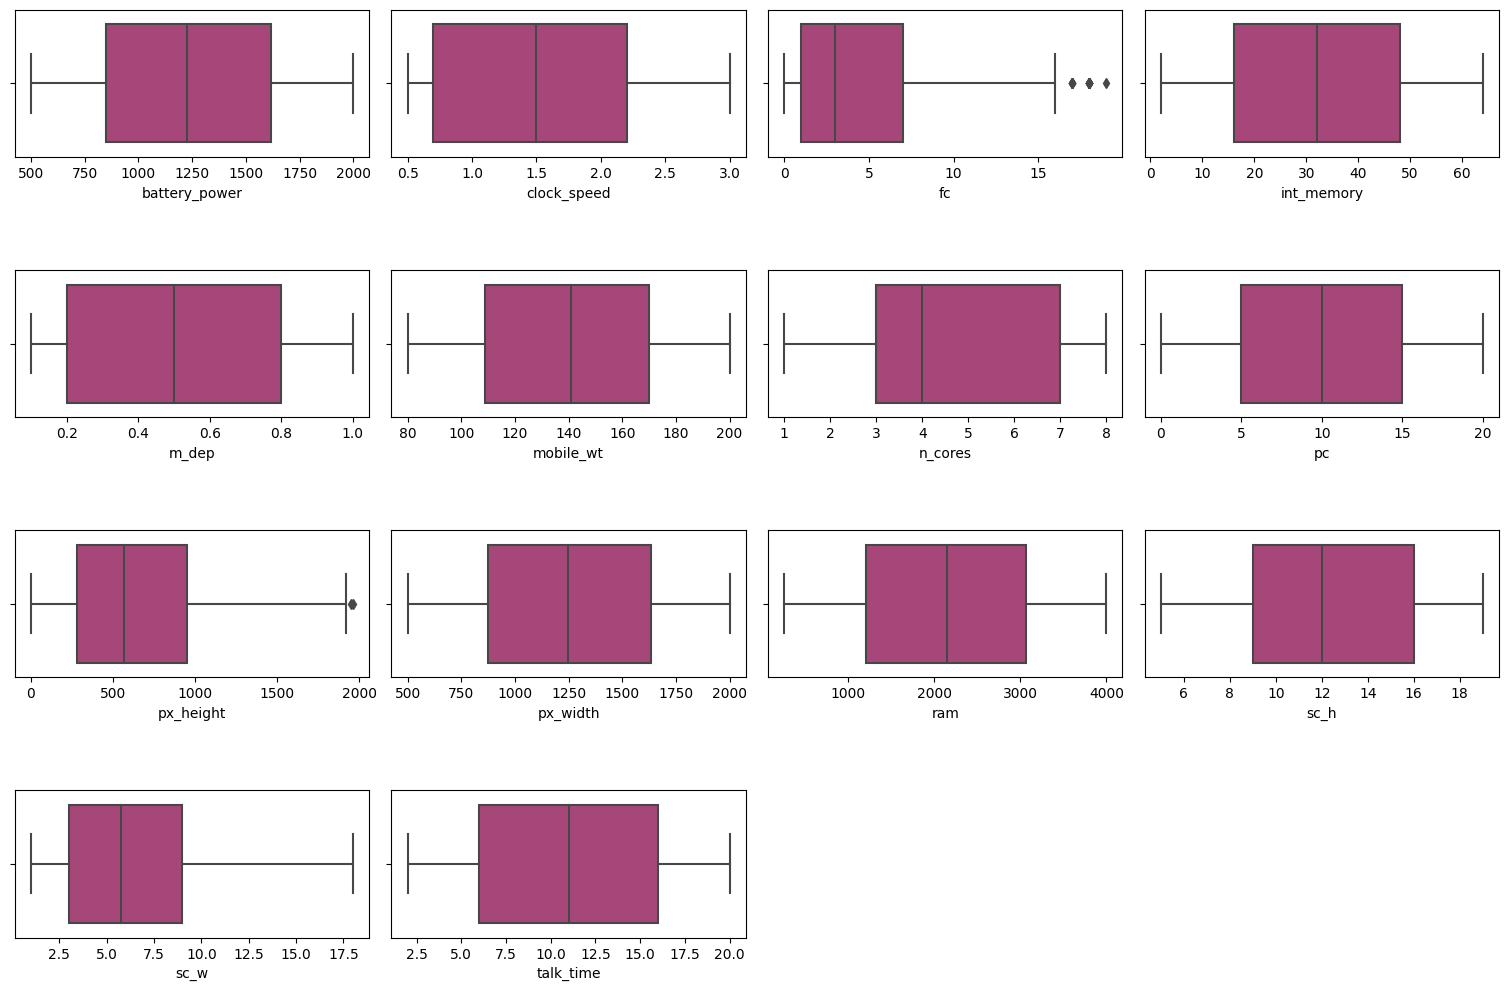

In [37]:
# Handling Outliers & Outlier treatments

#Checking for outliers

fig = plt.figure(figsize=(15,25))
c=1
for i in numerical_columns :
    plt.subplot(10, 4, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.boxplot(x=i,data=df,palette = "magma")
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

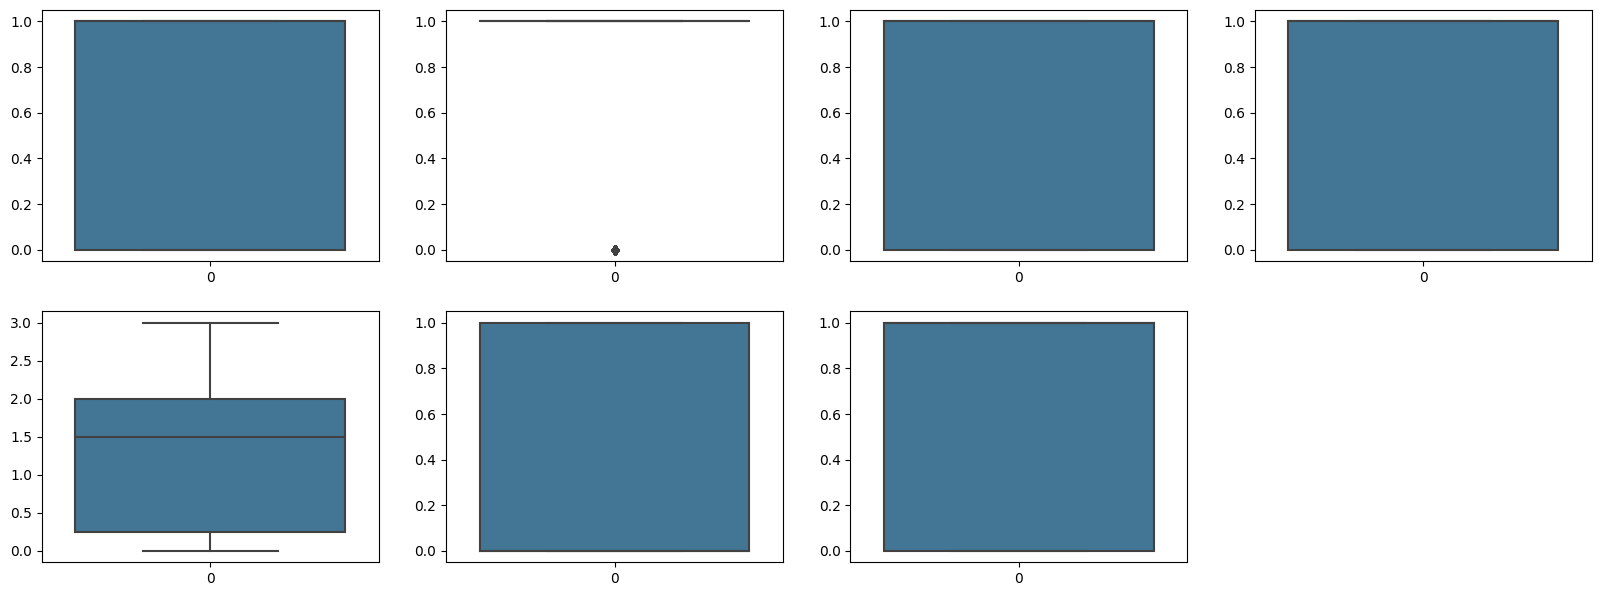

In [38]:
columns = categorical_columns
plt.figure(figsize=(20,15))
m=1
for i in columns:
  plt.subplot(4,4,m)
  m = m+1
  sns.boxplot(df[i],palette = "mako_r")

##### What all outlier treatment techniques have you used and why did you use those techniques?

Extreme outliers are not present to deal with.

### 3. Categorical Encoding

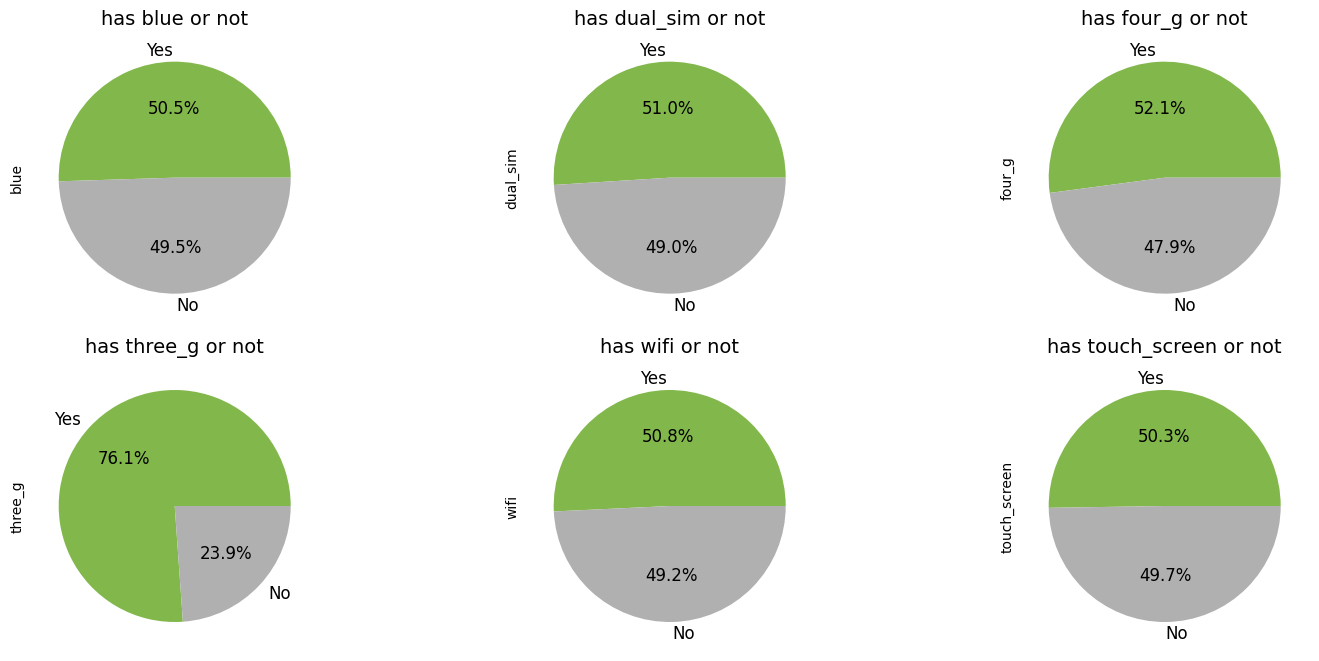

In [39]:
# Encode your categorical columns

# Plotting the piecharts for binary categorical variables.
plt.figure(figsize=(15,10))

rows=3
col=3
count=1
var_list=['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels=['Yes','No']
for var in var_list:
  plt.subplot(rows,col,count)
  df[var].value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,labels=labels, colors =["#82b74b","#b0b0b0"] )
  plt.title(f'has {var} or not',fontsize=14)
  plt.tight_layout()
  count=count+1

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [40]:
# Manipulate Features to minimize feature correlation and create new features

# Manipulate Features to minimize feature correlation and create new features
df1 = df.copy()

# create new column screen size and pixels
df['screen_size']= round(np.sqrt(df['sc_h']**2+df['sc_w']**2)/2.54,2)

df['Pixels']=df['px_height']*df['px_width']

#### 2. Feature Selection

In [41]:
# Select your features wisely to avoid overfitting
#dropping excess columns
df.drop(columns=["sc_h",'sc_w','px_height','px_width'],axis=1,inplace=True)

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [42]:
# Transform Your data
# creating the set of dependent and independent variables
X = df.drop(labels='price_range', axis=1)
y = df['price_range']

### 6. Data Scaling

In [43]:
# Scaling your data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [44]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [45]:
# Split your data to train and test. Choose Splitting ratio wisely.

# Splitting dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)

In [46]:
X_train.shape

(1598, 18)

In [47]:
y_train.shape

(1598,)

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

We have a balanced dataset.

In [48]:
# Handling Imbalanced Dataset (If needed)

## ***7. ML Model Implementation***

In [49]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,recall_score,precision_score,f1_score,roc_auc_score

In [50]:
def evaluate_model(name,x_test,y_true,y_pred):

  '''
  This function calculate  metrics for evaluating
  the perfomance of Regression models
  '''
  list_of_scores=[]
  #Accuracy
  Accuracy =  accuracy_score(y_true,y_pred)
  print(f'Accuracy : {Accuracy}')

  #Recall
  Recall  = recall_score(y_true,y_pred,average='weighted')
  print("Recall :" , {Recall})

  #precision
  Precision = precision_score(y_true,y_pred,average='weighted')
  print("Precision :" ,{Precision})

  #f1 score
  F1 = f1_score(y_true,y_pred,average='weighted')
  print("F1 :" ,{F1})

  #finding the adjusted r2 score
  # Auc=roc_auc_score(y_true,y_pred,average='weighted',multi_class='ovr')
  # print("Adjusted R2 : ",{Auc})

  list_of_scores.extend([name,Accuracy,Recall,Precision,F1])
  return(list_of_scores)

In [51]:
def classification_performance(y_,y_pred):
  '''
  prints the confusion matrix,classification report and accuracy score of the model

  '''
  from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
  #accuracy
  print("Accuracy score is {}".format(accuracy_score(y_, y_pred)))

  #confusion matrix and classification report for the test/train set
  print("-"*60)
  print('Classification report')
  print(classification_report(y_, y_pred,digits=3))

  print("Confusion matrix")
  labels = ['Low', 'Medium','High','Premium']
  cm = confusion_matrix(y_, y_pred)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax,cmap = "summer") #annot=True to annotate cells
  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)
  print("-"*60)

### ML Model - 1 - Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
# ML Model - 1 Implementation
lr = LogisticRegression()

# Fit the Algorithm
lr.fit(X_train, y_train)

# Predict on the model
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

Evaluating the performance on Train data
Accuracy score is 0.9161451814768461
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.952     0.980     0.966       402
           1      0.890     0.890     0.890       408
           2      0.904     0.817     0.858       393
           3      0.917     0.977     0.946       395

    accuracy                          0.916      1598
   macro avg      0.916     0.916     0.915      1598
weighted avg      0.916     0.916     0.915      1598

Confusion matrix
------------------------------------------------------------


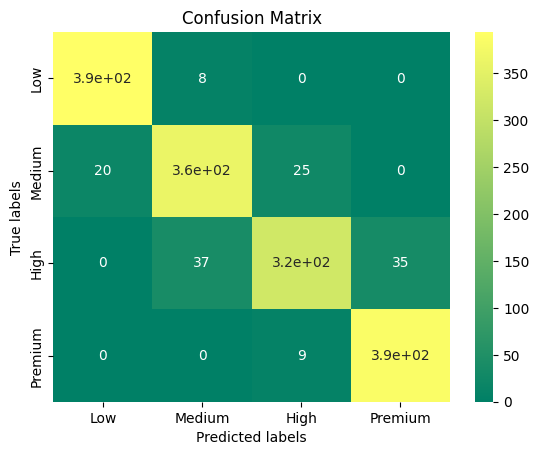

In [53]:
# Accuracy score,confusion matrix and classification report for training set
print('Evaluating the performance on Train data')
classification_performance(y_train,y_pred_train)

Evaluating the performance on Test data
Accuracy score is 0.905
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.949     0.939     0.944        99
           1      0.868     0.859     0.863        92
           2      0.841     0.900     0.870       100
           3      0.962     0.917     0.939       109

    accuracy                          0.905       400
   macro avg      0.905     0.904     0.904       400
weighted avg      0.907     0.905     0.906       400

Confusion matrix
------------------------------------------------------------


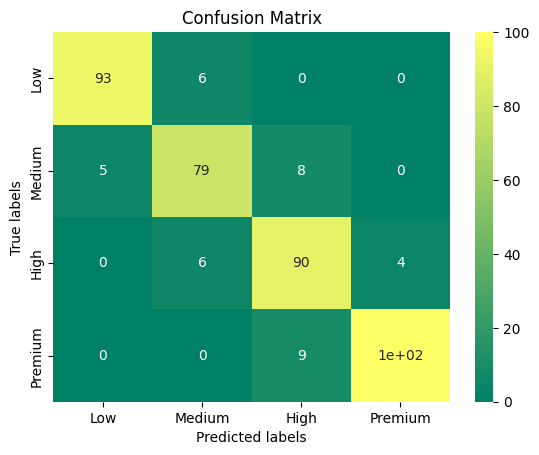

In [54]:
# Evaluation metrics for train
# Accuracy score,confusion matrix and classification report for training set
print('Evaluating the performance on Test data')
classification_performance(y_pred_test, y_test)


In [55]:
# models list for dataframe of models
models_list = []

In [56]:
#Evaluating the model
models_list.append(evaluate_model('Logistic Regression',X_test,y_test,y_pred_test))

Accuracy : 0.905
Recall : {0.905}
Precision : {0.9047868861128235}
F1 : {0.904480713032872}


### ML Model - 2 - Random Forest Classifier

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [59]:
#Fitting the RF Classifier with default parameters to the training set
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier( )
rfc.fit(X_train, y_train)

RandomForestClassifier()

Evaluating the performance on Train data
Accuracy score is 1.0
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       402
           1      1.000     1.000     1.000       408
           2      1.000     1.000     1.000       393
           3      1.000     1.000     1.000       395

    accuracy                          1.000      1598
   macro avg      1.000     1.000     1.000      1598
weighted avg      1.000     1.000     1.000      1598

Confusion matrix
------------------------------------------------------------


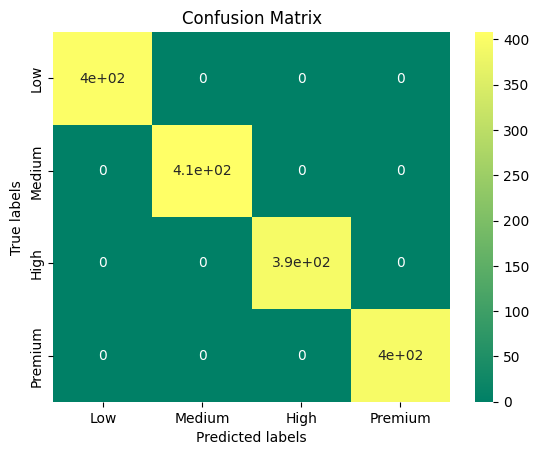

In [60]:
#Predicting the test set result
y_pred_train= rfc.predict(X_train)
# Accuracy score,confusion matrix and classification report for testing set
print('Evaluating the performance on Train data')
classification_performance(y_train,y_pred_train)

Evaluating the performance on Test data
Accuracy score is 0.865
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.948     0.929     0.938        98
           1      0.818     0.890     0.853        91
           2      0.810     0.794     0.802       107
           3      0.890     0.856     0.873       104

    accuracy                          0.865       400
   macro avg      0.866     0.867     0.866       400
weighted avg      0.866     0.865     0.865       400

Confusion matrix
------------------------------------------------------------


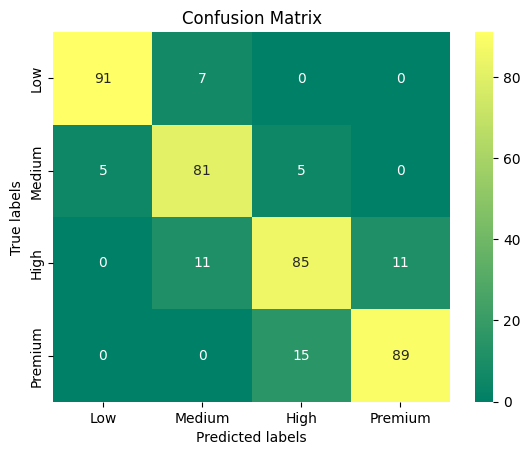

In [61]:
#Predicting the test set result
y_pred_test= rfc.predict(X_test)
# Accuracy score,confusion matrix and classification report for testing set
print('Evaluating the performance on Test data')
classification_performance(y_test,y_pred_test)

In [62]:
#Evaluating the model
models_list.append(evaluate_model('Random Forest (Baseline)',X_test,y_test,y_pred_test))

Accuracy : 0.865
Recall : {0.865}
Precision : {0.866323566017316}
F1 : {0.8651865071144398}


In [63]:
# making function to plot model's feature importance
def plotting_imp_features(model, training_data):
  imp_features = model.feature_importances_
  feature_names = training_data.columns
  _imp_features = pd.Series(imp_features, index=feature_names)
  mobile_data=pd.DataFrame({'Features':feature_names,'Importance':imp_features})
  mobile_data=mobile_data.sort_values(by='Importance',ascending=False).head(10)
  sns.barplot(x='Importance',y='Features',data=mobile_data,palette = 'Set1')

In [64]:
rfc.feature_importances_

array([0.08008254, 0.00767333, 0.030708  , 0.00818421, 0.02575861,
       0.00681244, 0.03958811, 0.02631701, 0.04357129, 0.02330338,
       0.03079463, 0.50675746, 0.0320403 , 0.00576289, 0.0071972 ,
       0.00683772, 0.04128635, 0.07732452])

In [65]:
X_train = pd.DataFrame(X_train, columns = X.columns)

X_test = pd.DataFrame(X_test, columns=X.columns)

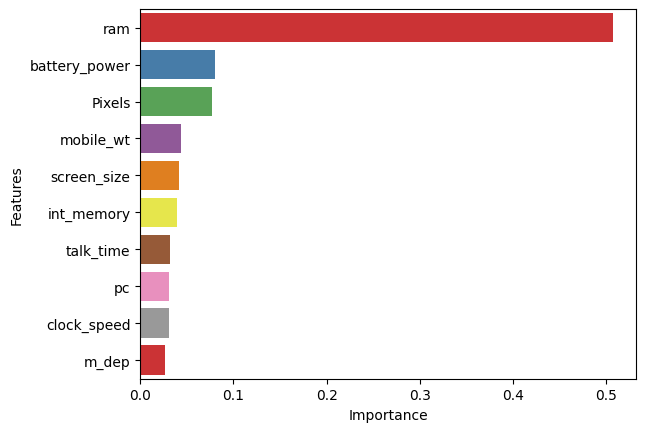

In [66]:
plotting_imp_features(rfc, X_train)

In [67]:
#Performing Grid Search Cross validation to find the best parameters
rfr=RandomForestClassifier( )
parameters_grid={'n_estimators' :[100, 300, 500],
                 'max_depth' : [5, 8, 15, 25, 30],
                 'min_samples_split' : [2, 5, 10, 15, 100],
                 'min_samples_leaf': [1, 2, 5, 10]}
rfr_cv = GridSearchCV(rfr, param_grid=parameters_grid, cv = 3, verbose = 1, n_jobs = -1,scoring='accuracy')
rfr_cv.fit(X_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 8, 15, 25, 30],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy', verbose=1)

In [68]:
print(rfr_cv.best_params_)

{'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [69]:
# implementing using best parameters
best_rfr=rfr_cv.best_estimator_
best_rfr.fit(X_train, y_train)

# prediction for training set
y_pred_train = best_rfr.predict(X_train)
# prediction fot testing set
y_pred_test =best_rfr.predict(X_test)

Evaluating the performance on Train data
Accuracy score is 1.0
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       402
           1      1.000     1.000     1.000       408
           2      1.000     1.000     1.000       393
           3      1.000     1.000     1.000       395

    accuracy                          1.000      1598
   macro avg      1.000     1.000     1.000      1598
weighted avg      1.000     1.000     1.000      1598

Confusion matrix
------------------------------------------------------------


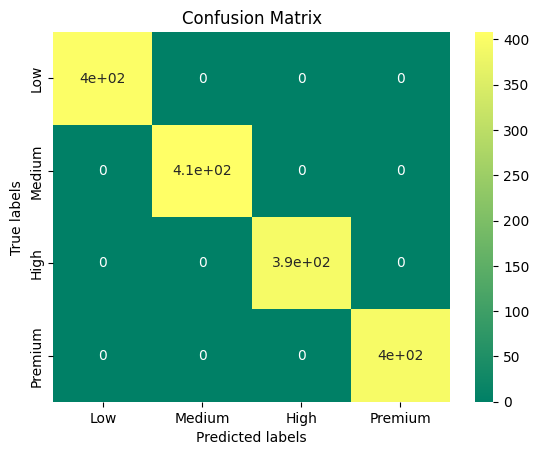

In [70]:
# Accuracy score,confusion matrix and classification report for training set
print('Evaluating the performance on Train data')
classification_performance(y_train,y_pred_train)

Evaluating the performance on Test data
Accuracy score is 0.875
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.930     0.949     0.939        98
           1      0.851     0.879     0.865        91
           2      0.811     0.841     0.826       107
           3      0.916     0.837     0.874       104

    accuracy                          0.875       400
   macro avg      0.877     0.876     0.876       400
weighted avg      0.876     0.875     0.875       400

Confusion matrix
------------------------------------------------------------


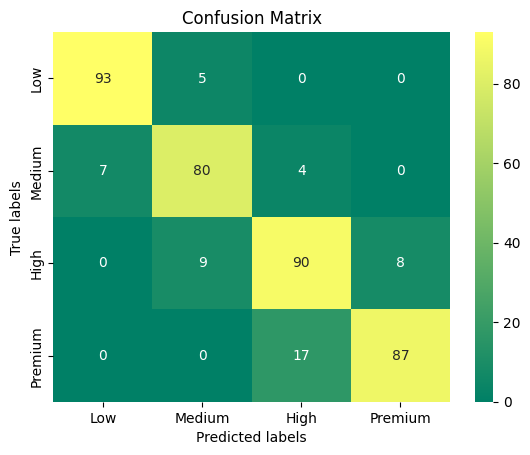

In [71]:
# Accuracy score,confusion matrix and classification report for testing set
print('Evaluating the performance on Test data')
classification_performance(y_test,y_pred_test)

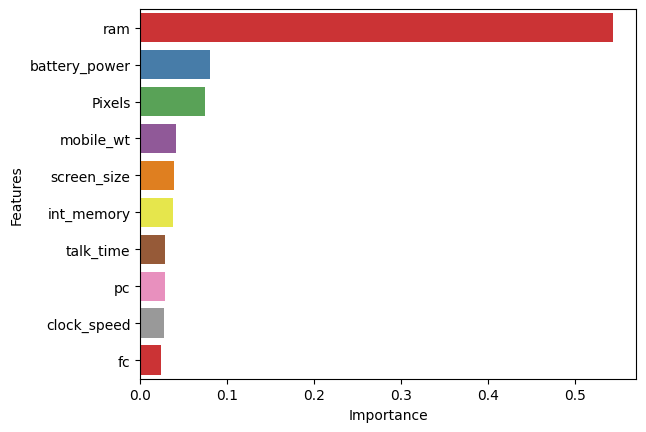

In [72]:
plotting_imp_features(best_rfr, X_train)

#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 - XG Boost

Evaluating the performance on Train data
Accuracy score is 1.0
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       402
           1      1.000     1.000     1.000       408
           2      1.000     1.000     1.000       393
           3      1.000     1.000     1.000       395

    accuracy                          1.000      1598
   macro avg      1.000     1.000     1.000      1598
weighted avg      1.000     1.000     1.000      1598

Confusion matrix
------------------------------------------------------------


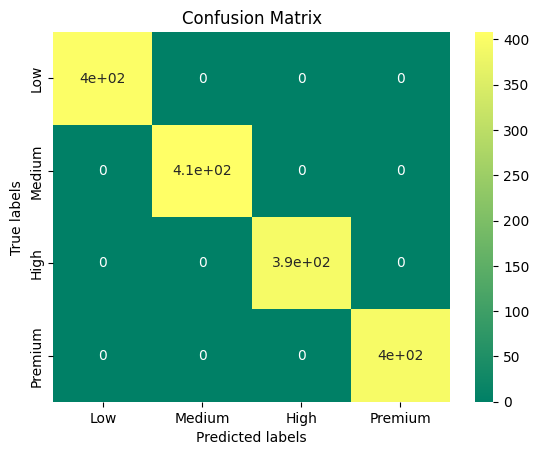

In [74]:
# Visualizing evaluation Metric Score chart
# Baseline XGB
import xgboost as xgb
xg_cls = xgb.XGBClassifier()
xg_cls.fit(X_train,y_train)

y_pred = xg_cls.predict(X_test)
y_pred_train = xg_cls.predict(X_train)

# Accuracy score,confusion matrix and classification report for training set
print('Evaluating the performance on Train data')
classification_performance(y_train,y_pred_train)

Evaluating the performance on Test data
Accuracy score is 0.91
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.968     0.918     0.942        98
           1      0.851     0.945     0.896        91
           2      0.887     0.879     0.883       107
           3      0.940     0.904     0.922       104

    accuracy                          0.910       400
   macro avg      0.912     0.911     0.911       400
weighted avg      0.912     0.910     0.910       400

Confusion matrix
------------------------------------------------------------


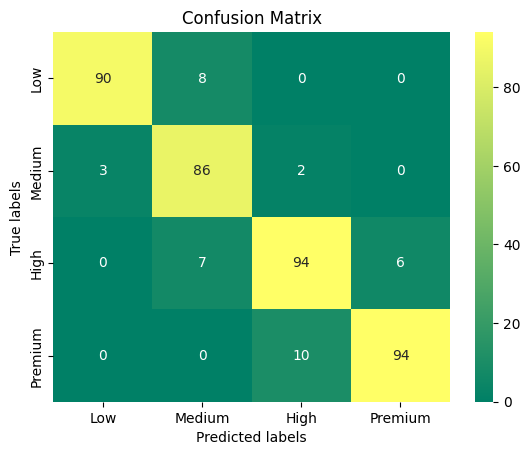

In [75]:
# Accuracy score,confusion matrix and classification report for testing set
print('Evaluating the performance on Test data')
classification_performance(y_test,y_pred)

In [76]:
#Evaluating the model
models_list.append(evaluate_model('XGBoost (Baseline)',X_test,y_test,y_pred))

Accuracy : 0.91
Recall : {0.91}
Precision : {0.9124266266127526}
F1 : {0.9104032652115857}


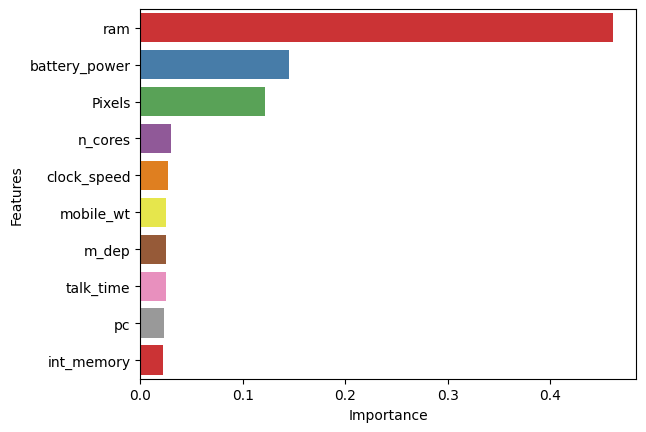

In [77]:
plotting_imp_features(xg_cls, X_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [78]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [79]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb_2 = XGBClassifier()
parameters = {#'nthread':[4], #when use hyperthread, xgboost may become slower # supressing this HP,as this makes thing slower
              'objective':['multi:softmax'],
              'learning_rate': [0.01,.03, 0.05, 0.07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [250,500,750,1000]}

xgb_grid = GridSearchCV(xgb_2,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[07:48:18] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

0.894255485893417
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 250, 'objective': 'multi:softmax', 'silent': 1, 'subsample': 0.7}


[07:48:20] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Evaluating the performance on Train data
Accuracy score is 1.0
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       402
           1      1.000     1.000     1.000       408
           2      1.000     1.000     1.000       393
           3      1.000     1.000     1.000       395

    accuracy                          1.000      1598
   macro avg      1.000     1.000     1.000      1598
weighted avg      1.000     1.000     1.000      1598

Confusion matrix
------------------------------------------------------------


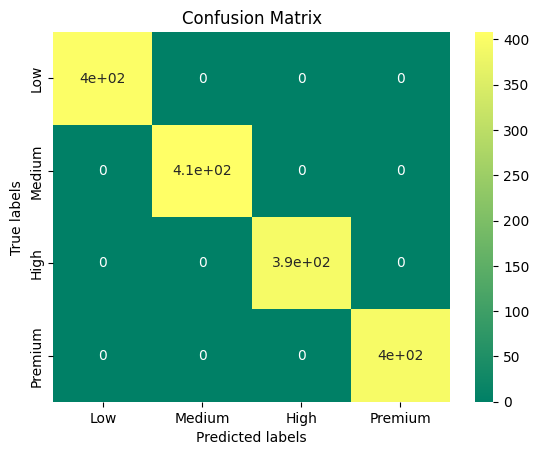

In [80]:
import xgboost as xgb
#Training data to the model with tuned parameters
xg_clf = xgb.XGBClassifier(colsample_bytree= 0.7, learning_rate= 0.07, max_depth= 5,
                           min_child_weight=4, n_estimators= 750, objective='multi:softmax', silent=1, subsample=0.7)
xg_clf.fit(X_train,y_train)
#Making predictions from XGB model with tuned parameters
Y_pred = xg_clf.predict(X_test)
y_pred_train_x = xg_clf.predict(X_train)

# Accuracy score,confusion matrix and classification report for testing set
print('Evaluating the performance on Train data')
classification_performance(y_train,y_pred_train_x)

Evaluating the performance on Test data
Accuracy score is 0.91
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.968     0.918     0.942        98
           1      0.851     0.945     0.896        91
           2      0.887     0.879     0.883       107
           3      0.940     0.904     0.922       104

    accuracy                          0.910       400
   macro avg      0.912     0.911     0.911       400
weighted avg      0.912     0.910     0.910       400

Confusion matrix
------------------------------------------------------------


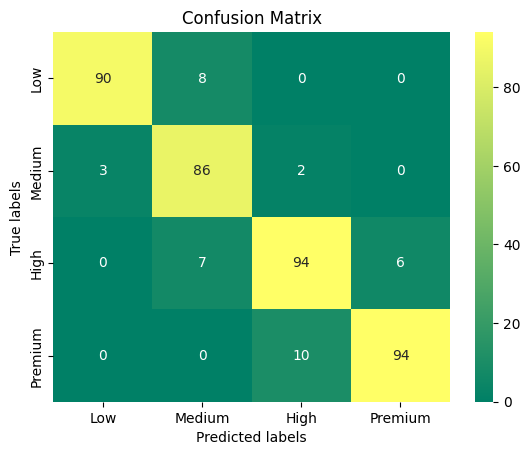

In [81]:
# Accuracy score,confusion matrix and classification report for testing set
print('Evaluating the performance on Test data')
classification_performance(y_test,y_pred)

In [82]:
#Evaluating the model
models_list.append(evaluate_model('XGBoost (Tuned)',X_test,y_test,y_pred))

Accuracy : 0.91
Recall : {0.91}
Precision : {0.9124266266127526}
F1 : {0.9104032652115857}


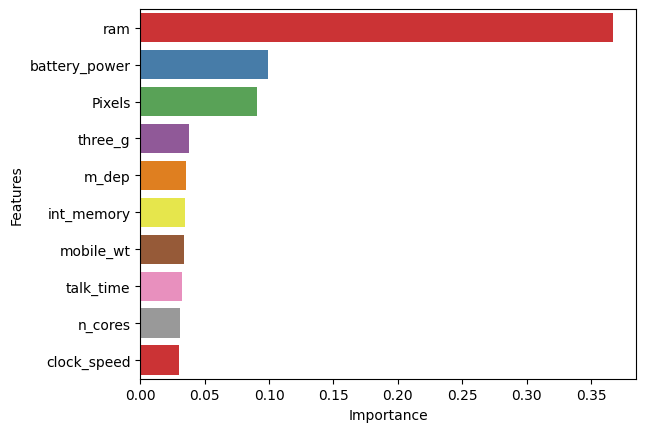

In [83]:
plotting_imp_features(xg_clf, X_train)

In [84]:
#Comparing models
models_stats=pd.DataFrame(models_list,columns=['Classification Model','Accuracy','Recall','Precision','F1-score'])
models_stats

,Classification Model,Accuracy,Recall,Precision,F1-score
0,Logistic Regression,0.905,0.905,0.904787,0.904481
1,Random Forest (Baseline),0.865,0.865,0.866324,0.865187
2,XGBoost (Baseline),0.910,0.910,0.912427,0.910403
3,XGBoost (Tuned),0.910,0.910,0.912427,0.910403


##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV for hyperparameter optimization. GridSearchCV is a technique that exhaustively searches over a predefined set of hyperparameter combinations and evaluates each combination using cross-validation.

###  Which ML model did you choose from the above created models as your final prediction model and why?

- XGBoost (Tuned) is the final prediction model selected.
Accuracy, recall, precision, and F1-score are the performance metrics shared by XGBoost (Tuned) and XGBoost (Baseline), respectively.
- XGBoost has a successful track record in machine learning competitions and is renowned for its capacity to handle complex relationships in data.

- GridSearchCV was used to optimise the hyperparameters of XGBoost (Tuned).
- The optimal mix of hyperparameters for better performance is chosen throughout the hyperparameter tuning procedure.
- Optimised values for crucial parameters like learning rate, maximum depth, and number of estimators are likely advantageous for the tuned model.
- Because it is the XGBoost algorithm variant that performs the best among the examined models, XGBoost (Tuned) is recommended.


# **Conclusion**

- With a value of 0.910 for each statistic, the models XGBoost (Baseline) and XGBoost (Tuned) had the greatest accuracy, recall, precision, and F1-score among those tested.
- With an accuracy of 0.905, recall of 0.905, precision of 0.904787, and F1-score of 0.904481, logistic regression likewise performed admirably.
- Random Forest (Baseline) performed marginally worse than the XGBoost models, with accuracy, recall, precision, and F1-scores of 0.865, 0.865, and 0.866324, respectively.
- Across all evaluation metrics, both XGBoost models (Baseline and Tuned) demonstrated consistent and excellent performance.
- It is the favoured model because it is anticipated to have optimised hyperparameters for better performance based on the identical performance metrics and the fact that XGBoost (Tuned) undergone hyperparameter optimisation.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***